# Problem Three

In [1]:
#Importing nessesary packages
import seaborn as sns
import pandas as pd
import os
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Setting the working directory
os.chdir('C:\Users\user\downloads')
Caravanfn = "Caravan_train.csv"
Caravan = pd.read_csv(Caravanfn)

# Exploratory Data Analysis

In [3]:
#What does this dataset look like?
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No


In [4]:
# Find frequency of labels to determine if case imbalence. 
Caravan['Purchase'].value_counts()

No     4346
Yes     284
Name: Purchase, dtype: int64

# Preproccessing

In [5]:
##changing column Purchase from class Purchase to class category
Caravan["Purchase"] = Caravan["Purchase"].astype('category')
##assign the encoded variables to new column
Caravan["Purchase_cat"] = Caravan["Purchase"].cat.codes
Caravan.dtypes

MOSTYPE            int64
MAANTHUI           int64
MGEMOMV            int64
MGEMLEEF           int64
MOSHOOFD           int64
MGODRK             int64
MGODPR             int64
MGODOV             int64
MGODGE             int64
MRELGE             int64
MRELSA             int64
MRELOV             int64
MFALLEEN           int64
MFGEKIND           int64
MFWEKIND           int64
MOPLHOOG           int64
MOPLMIDD           int64
MOPLLAAG           int64
MBERHOOG           int64
MBERZELF           int64
MBERBOER           int64
MBERMIDD           int64
MBERARBG           int64
MBERARBO           int64
MSKA               int64
MSKB1              int64
MSKB2              int64
MSKC               int64
MSKD               int64
MHHUUR             int64
                  ...   
PWAOREG            int64
PBRAND             int64
PZEILPL            int64
PPLEZIER           int64
PFIETS             int64
PINBOED            int64
PBYSTAND           int64
AWAPART            int64
AWABEDR            int64


In [6]:
Caravan = Caravan.select_dtypes(include=['int8','int64']).copy()

In [7]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase_cat
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,0


# Partitioning the Dataset

In [8]:
X_Caravan = Caravan.drop('Purchase_cat', axis=1)
X_Caravan.shape

(4630, 85)

In [9]:
Y_Caravan =Caravan['Purchase_cat']
Y_Caravan.shape

(4630L,)

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_Caravan, Y_Caravan,
                                                random_state=66)

# Naive Bayes

In [11]:
                                           # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [12]:
#Get accuracy score from model used above
accuracy_score(ytest, y_model)

0.14075993091537134

In [13]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5096231243317275

# Logistic Regression

In [14]:
logreg = LogisticRegression().fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(Xtest, ytest)))


Training set score: 0.941
Test set score: 0.934


In [15]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5060309718034047

In [16]:
logreg100 = LogisticRegression(C=100).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg100.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg100.score(Xtest, ytest)))


Training set score: 0.940
Test set score: 0.932


In [17]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5060309718034047

In [18]:
logreg001 = LogisticRegression(C=0.01).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg001.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg001.score(Xtest, ytest)))

Training set score: 0.940
Test set score: 0.934


In [19]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)


0.5060309718034047

# K Nearest Neighbors

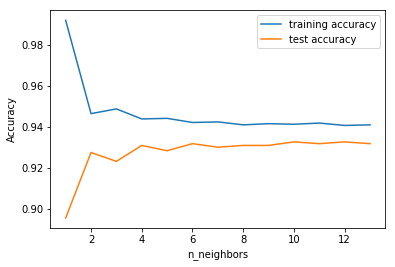

In [20]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 14)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


After looking at the graph comparing performance from k = 1 to 14 nearest neighbors it looks like 2, 4, 6 and 8 might be optimal.

In [21]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.93


In [22]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.4967622571692877

In [23]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))


Test set accuracy: 0.93


In [24]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)


0.49861239592969475

In [25]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))


Test set accuracy: 0.93


In [26]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5051059024232012

In [27]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.93


In [28]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.49861239592969475

Looks like a three way tie. Optionally we could change the random seed used to partition our data set if we wanted to more rigorously test these four options. However it is unlikely this will change the results significantly so we might as well randomly pick one of the options.

# Decision Tree

In [29]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.993
Accuracy on test set: 0.878


In [30]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5307074978675349

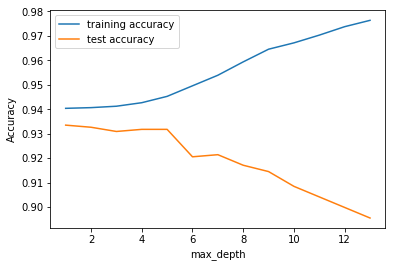

In [31]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 14
max_depth_settings = range(1, 14)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Looks like max_depth at 1 looks optimal. Lets try it out

In [32]:
tree = DecisionTreeClassifier(max_depth=1, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.940
Accuracy on test set: 0.934


In [33]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)


0.5

In [34]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.959
Accuracy on test set: 0.916


In [35]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5269351370183933

Interestingly the accuracy score on the max_depth is higher at 1 than at 8 but the area under the roc curve is higher with max_depth = 8

# Random Forest

In [36]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 0.993
Accuracy on test set: 0.927


In [37]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5143926378894002

In [38]:
forest = RandomForestClassifier(n_estimators=6, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 0.980
Accuracy on test set: 0.927


In [39]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5083616660859954

# Gradient Boosting Classifier

In [40]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.949
Accuracy on test set: 0.928


In [41]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)


0.5153177072696036

In [42]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.940
Accuracy on test set: 0.934


In [43]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.941
Accuracy on test set: 0.933


In [45]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)


0.49953746530989823

# Support Vector Machine

In [46]:
#DONT RUN (Unless you want to wait a really really really really long time)
#svc = SVC(C=1000)
#svc.fit(Xtrain, ytrain)
#
#print("Accuracy on training set: {:.2f}".format(svc.score(Xtrain, ytrain)))
#print("Accuracy on test set: {:.2f}".format(svc.score(Xtest, ytest)))

# Neural Nets

In [47]:
mlp = MLPClassifier(random_state=42)
mlp.fit(Xtrain, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.2f}".format(mlp.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(Xtest, ytest)))

Accuracy on training set: 0.95
Accuracy on test set: 0.92


In [48]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5009430902122853

In [49]:
# compute the mean value per feature on the training set
mean_on_train = Xtrain.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = Xtrain.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (Xtrain - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (Xtest - mean_on_train) / std_on_train


In [50]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.981
Accuracy on test set: 0.915


In [51]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5418083304299771

In [52]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.981
Accuracy on test set: 0.915


In [53]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5418083304299771

In [54]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.947
Accuracy on test set: 0.929


In [55]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.560363780530293

# Getting a list of the top 50 clients

In [63]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0
5,12,1,4,2,3,0,4,0,5,9,...,0,0,0,0,0,0,0,0,0,0
6,38,1,3,2,9,0,4,0,5,9,...,0,0,0,0,1,0,0,0,0,0
7,3,1,2,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
8,8,1,3,3,2,1,7,0,1,6,...,0,0,0,0,1,0,0,0,0,0
9,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,1,0,0,0,0,0


In [186]:
#probs = logreg.predict_proba(Caravan_unk)[:,1]
probs = mlp.predict_proba(Caravan_unk)[:,1] #Use mlp model to predict likelihood of each the [:,1] specifies column 2 which 
                                            #has liklihood for Yes purchase decision
probs

array([0.00522536, 0.00665952, 0.87800416, ..., 0.00608473, 0.00239275,
       0.00687612])

In [190]:
probs = pd.DataFrame(probs)
probs.columns = probs.columns +1
probs.index = probs.index 
probs.dtypes

1    float64
dtype: object

In [191]:
done = pd.merge(Caravan_unk, probs, left_index=True, right_index=True)
done.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,1
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,1,0,1,0,0,0,0.005225
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0.006660
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.878004
3,38,1,3,2,9,2,2,2,4,7,...,0,0,1,0,0,0,0,0,0,0.033303
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,1,0,0,0,0,0,0.066137


In [195]:
list(done)

In [202]:
sorteddone = done.sort_values(by=[1L], ascending=False) #sort by most likely
proba =sorteddone[1L] #only the probabilities

In [203]:
proba.head(n=50) #Just the top 50

51      0.899684
30      0.881402
738     0.881179
2       0.878004
389     0.847796
20      0.837854
354     0.835238
467     0.830305
651     0.816891
414     0.815771
57      0.811866
423     0.800034
403     0.792825
31      0.780058
402     0.779353
44      0.741234
527     0.734055
329     0.720379
29      0.720323
975     0.713081
868     0.702078
113     0.702039
525     0.689091
732     0.683381
952     0.672637
285     0.668328
644     0.667383
156     0.661446
306     0.655483
235     0.651796
65      0.650757
109     0.650755
134     0.650754
765     0.648060
34      0.643255
835     0.641775
853     0.640384
872     0.639922
687     0.639918
28      0.635889
912     0.627710
11      0.626868
26      0.626868
715     0.613837
921     0.613096
1059    0.610337
247     0.609915
241     0.609745
332     0.605877
849     0.602783
Name: 1, dtype: float64